In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode
from datetime import timedelta
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = {'customers': 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg', 
              'orders': 'https://disk.yandex.ru/d/0zWmh1bYP6REbw', 
              'items': 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'}
for key in public_key:
    final_url = base_url + urlencode(dict(public_key=public_key[key]))
    response = requests.get(final_url)
    public_key[key] = response.json()['href']

df_customers = pd.read_csv(public_key['customers'])
df_items = pd.read_csv(public_key['items'])
df_orders = pd.read_csv(public_key['orders'], parse_dates=['order_purchase_timestamp'])

In [3]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
print(df_customers.info())
print(df_items.info())
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  

In [7]:
df_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Если пользователь отменил заказ до того, как он был подтвержден, то не считаю это покупкой. Может случайо нажал или еще что то.
Присутствует доставленные заказы и т.п.(не только созданные), при этом отсутствует время, буду считать, что не записалось и оставлю их.

In [8]:
merged = df_customers.merge(df_orders, on='customer_id')

misclick_or_smth = merged.loc[(merged.order_approved_at.isna() == True) & (merged.order_status == 'canceled')]
misclick_or_smth = misclick_or_smth.customer_id

purchases = merged.query('customer_id not in @misclick_or_smth')

first_question = (purchases.customer_unique_id.value_counts() == 1).sum()
first_question

93064

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам?
Можно было взять дф с покупками, но по сути отмененный заказ тоже не доставленный заказ.

In [104]:
df_orders['YM'] = df_orders.order_purchase_timestamp.dt.to_period('M')
df_orders['month'] = df_orders.order_purchase_timestamp.dt.month
df_orders['week'] = df_orders.YM \
    .apply(lambda x: str(x)[2:4]) + '_' + df_orders.order_purchase_timestamp.dt.isocalendar().week.astype(str)

not_delivered = df_orders \
    .loc[(df_orders.order_delivered_customer_date.isna() == True) & (df_orders.order_status != 'delivered')] \
    .sort_values('order_purchase_timestamp')
not_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,YM,month,week
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00,2016-09,9,16_35
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00,2016-09,9,16_36
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00,2016-09,9,16_37
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00,2016-10,10,16_39
76582,1aecadf4362edaca7fa033e882076c8d,e81a9f176936e3124dfd90c483bf3289,canceled,2016-10-04 10:05:45,2016-10-04 10:26:40,NaN,NaN,2016-11-24 00:00:00,2016-10,10,16_40
...,...,...,...,...,...,...,...,...,...,...,...
50387,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaN,NaN,NaN,2018-10-15 00:00:00,2018-09,9,18_39
88500,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaN,NaN,NaN,2018-10-23 00:00:00,2018-10,10,18_40
31891,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaN,NaN,NaN,2018-10-16 00:00:00,2018-10,10,18_40
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaN,NaN,NaN,2018-11-12 00:00:00,2018-10,10,18_42


In [10]:
not_delivered.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

In [11]:
# shipped == 1107, может утонул корабль с большой партией?)
not_delivered.query('order_status == "shipped"') \
    .groupby('week').agg({'order_status': 'count'}) \
    .reset_index().order_status.max()
# Nope

34

Text(0.5, 1.0, 'Not delivered per month')

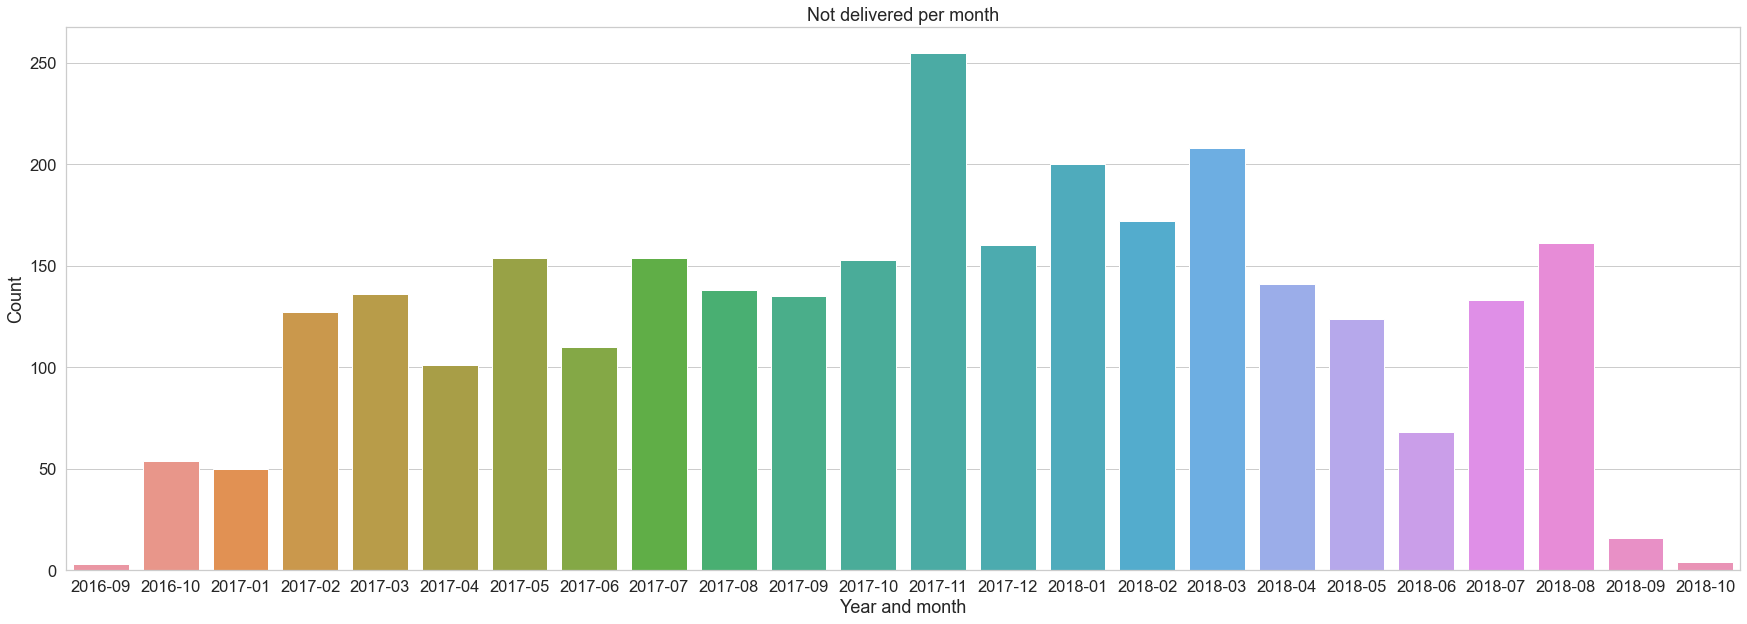

In [12]:
sns.set(font_scale=1.5,
        style="whitegrid",
        rc={'figure.figsize': (30, 10),
            'font.size': 20})

sns.countplot(data=not_delivered, x='YM')
plt.xlabel('Year and month')
plt.ylabel('Count')
plt.title("Not delivered per month")

In [13]:
# Не возьму выброс 2018-09&10 & не возьму 2016 год, тк он обрывается
not_delivered = not_delivered.query('YM >= "2017-01" & YM <= "2018-08"')
not_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,YM,month,week
94965,195416246665b8268100ef5fde9722b4,b14e4569fdc3353689f16abb8b57dadc,shipped,2017-01-08 19:27:22,2017-01-08 19:45:02,2017-01-11 09:34:18,NaN,2017-02-22 00:00:00,2017-01,1,2017_1
12751,46936461f0c4e3c80b9289ce5fc1682a,f6295486d5e27c0de0101b3f1b63b6d1,shipped,2017-01-08 19:27:22,2017-01-08 19:45:02,2017-01-11 09:34:18,NaN,2017-02-21 00:00:00,2017-01,1,2017_1
45181,255d951095fc26f86cc7a08b822b714a,4aa40fd3991ea64e9dead06fe15f021c,processing,2017-01-11 15:18:25,2017-01-11 15:30:11,NaN,NaN,2017-03-01 00:00:00,2017-01,1,2017_2
59433,587a39d6ab7297ee16b3d5ebdaa0f776,69ed85715d3bff3b648ef923daed0056,canceled,2017-01-11 18:32:24,2017-01-11 18:45:23,NaN,NaN,2017-02-21 00:00:00,2017-01,1,2017_2
58473,19512a70f62306416782f963d55c8b26,e914087f4bedebda8f0dc92e4d095d16,invoiced,2017-01-12 15:05:52,2017-01-12 15:15:10,NaN,NaN,2017-03-02 00:00:00,2017-01,1,2017_2
...,...,...,...,...,...,...,...,...,...,...,...
17983,0a472c47d928bf4cd8b6a7a30345eeb7,8762d94c493b70216cd453ea2320234e,canceled,2018-08-30 10:14:00,NaN,NaN,NaN,2018-10-02 00:00:00,2018-08,8,2018_35
25953,bb8edfe0742a6a0279b7dff848289568,c2a1740e781cc978dbab71735cf3ce84,canceled,2018-08-30 10:24:34,NaN,NaN,NaN,2018-09-18 00:00:00,2018-08,8,2018_35
29915,2663ce3526465b7ee9809428adabdc45,032a544bbe984490f6ff7450e3c8b0bc,canceled,2018-08-30 13:07:46,NaN,NaN,NaN,2018-09-12 00:00:00,2018-08,8,2018_35
88141,572c4bbf0f5f85a9b4a2c4fe0c7f04d5,93ccdc49f22d1b0e3664b2bc328cf23d,canceled,2018-08-30 15:11:58,NaN,NaN,NaN,2018-09-14 00:00:00,2018-08,8,2018_35


Text(0.5, 1.0, 'Not delivered per month')

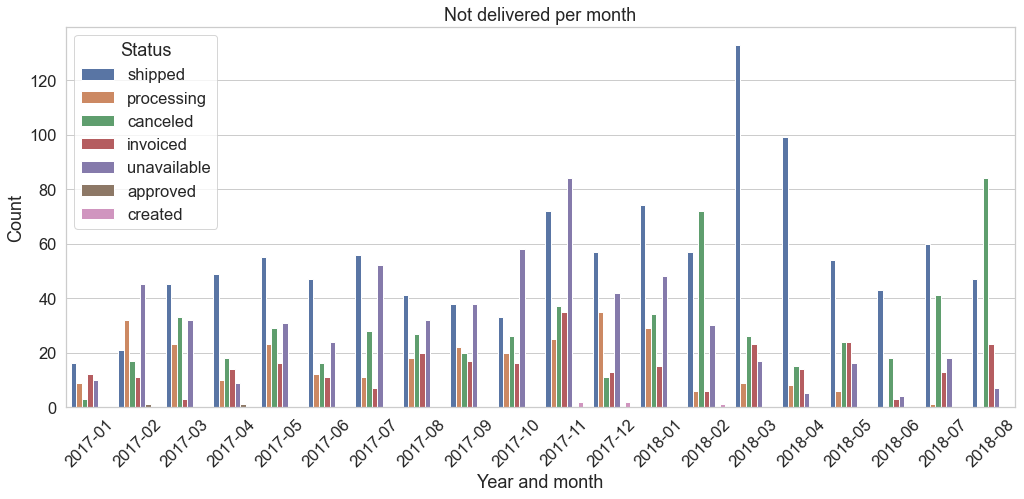

In [14]:
sns.set(font_scale=1.5,
        style="whitegrid",
        rc={'figure.figsize': (17, 7),
            'font.size': 10})
plt.xticks(rotation=45)
sns.countplot(data=not_delivered, x='YM', hue='order_status')
plt.legend(loc='upper left', title='Status')
plt.xlabel('Year and month')
plt.ylabel('Count')
plt.title("Not delivered per month")

<AxesSubplot:xlabel='week', ylabel='count'>

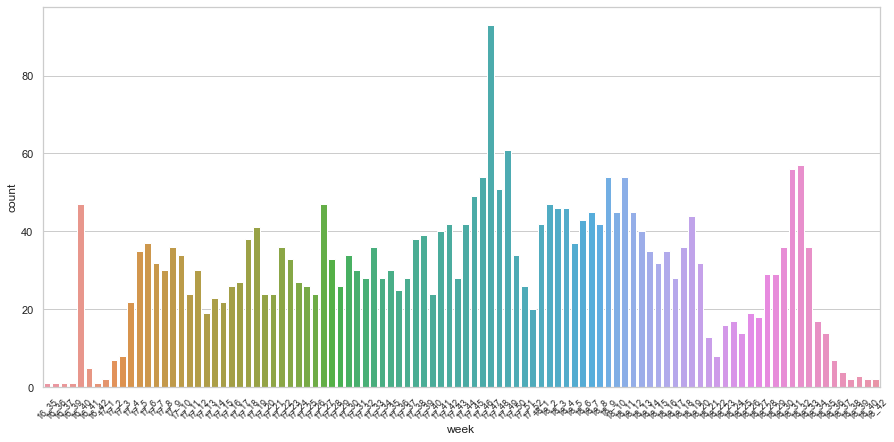

In [105]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize': (15, 7)})
plt.xticks(rotation=45, fontsize=9)
sns.countplot(data=not_delivered, x='week')

In [16]:
not_delivered.groupby('YM') \
    .agg({'order_status': 'count'}).reset_index().mean()

order_status    144.0
dtype: float64

In [17]:
second_question = not_delivered.groupby(['YM', 'order_status']).agg({'order_id': 'count'}) \
    .groupby('order_status').agg({'order_id': 'mean'}).rename(columns={'order_id': 'count'}).reset_index()

# В среднем в месяц и по какой причине.
second_question

,order_status,count
0,approved,1.000000
1,canceled,28.950000
2,created,1.666667
3,invoiced,14.800000
4,processing,16.611111
5,shipped,54.850000
6,unavailable,30.100000


## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [18]:
the_third = df_items.merge(df_orders, on='order_id')
the_third['day'] = the_third.order_purchase_timestamp.dt.day_name()

a = the_third.groupby(['product_id', 'day']).agg({'order_item_id': 'count'}) \
    .rename(columns={'order_item_id': 'count'}).reset_index()
# Объединил дата-фреймы, посчитал кол-во покупок в день недели.

In [19]:
c = a.groupby('product_id').agg({'count': 'max'}).reset_index()
c
# Нашел максимум для каждого товара

,product_id,count
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,1
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


In [20]:
d = a.merge(c, how='left', on='product_id')
third_question = d.query('count_x == count_y').sort_values('product_id') \
    .rename(columns={'count_x': 'count'}) \
    .drop('count_y', axis=1)
# Нашел в какой день было максимум покупок. 
# Для некоторых товаров максимум был в разные дни(пример: товар №1, макс(1шт) дни=ср, пт. 
# Поэтому дубликаты не убирал.
third_question = third_question.groupby(['product_id', 'count']) \
    .agg({'day': lambda x: list(x) if len(x) > 1 else x.iloc[0]}).reset_index()
third_question

,product_id,count,day
0,00066f42aeeb9f3007548bb9d3f33c38,1,Sunday
1,00088930e925c41fd95ebfe695fd2655,1,Tuesday
2,0009406fd7479715e4bef61dd91f2462,1,Thursday
3,000b8f95fcb9e0096488278317764d19,1,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,1,Tuesday
...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,1,"[Saturday, Sunday]"
32947,fff81cc3158d2725c0655ab9ba0f712c,1,Monday
32948,fff9553ac224cec9d15d49f5a263411f,1,Friday
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2,Tuesday


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [34]:
purchases['YM'] = purchases.order_purchase_timestamp.dt.to_period('M')
purchases['month'] = purchases.order_purchase_timestamp.dt.month

# Посчитаю покупок в месяц
the_forth_question = purchases.groupby(['YM', 'month', 'customer_unique_id']) \
    .agg({'customer_id': 'count'}).reset_index()

# Добавлю кол-во недель в месяце, посчитал покупки в неделю, и среднее.
the_forth_question['weeks'] = (the_forth_question.YM.dt.daysinmonth / 7).round(2)
the_forth_question['PpW'] = (the_forth_question.customer_id / the_forth_question.weeks).round(2)
the_forth_question = the_forth_question.groupby(['month', 'customer_unique_id']).agg({'PpW': 'mean'}).reset_index()
the_forth_question

,month,customer_unique_id,PpW
0,1,000d460961d6dbfa3ec6c9f5805769e1,0.23
1,1,00115fc7123b5310cf6d3a3aa932699e,0.23
2,1,0014a5a58da615f7b01a4f5e194bf5ea,0.23
3,1,0028cfeb9dfcd3628a56d5b6400deef5,0.23
4,1,002d3bd901608f67c3fc11eaaa842b13,0.23
...,...,...,...
97885,12,ffdf72e25c6f0503bb567d0a8cf1c159,0.23
97886,12,fff7219c86179ca6441b8f37823ba3d3,0.23
97887,12,fffb09418989a0dbff854a28163e47c6,0.23
97888,12,fffbf87b7a1a6fa8b03f081c5f51a201,0.23


## 5. Используя pandas, проведи когортный анализ пользователей.
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [78]:
# Взял период 2017г,тк он полный. Определил когорты.
fifth = purchases.query("'2017-01' <= YM <= '2017-12'")
fifth["cohort"] = fifth.groupby('customer_unique_id')['month'].transform('min')
fifth

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,YM,month,cohort
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05,5,5
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,2017-09-28 17:32:43,2017-10-04 00:00:00,2017-09,9,9
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,2017-11-27 12:44:36,2017-12-08 00:00:00,2017-11,11,11
10,9fb35e4ed6f0a14a4977cd9aea4042bb,2a7745e1ed516b289ed9b29c7d0539a5,39400,montes claros,MG,8428e578bb1cf839ae26a6b7615502b9,delivered,2017-11-27 17:23:20,2017-11-27 18:01:20,2017-11-28 23:04:41,2017-12-08 22:16:17,2017-12-20 00:00:00,2017-11,11,11
12,b2d1536598b73a9abd18e0d75d92f0a3,918dc87cd72cd9f6ed4bd442ed785235,18682,lencois paulista,SP,83d8f70418eefd96f37b483dff430305,delivered,2017-09-09 09:54:57,2017-09-09 10:10:17,2017-09-12 12:42:43,2017-09-20 20:23:34,2017-10-02 00:00:00,2017-09,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99430,27b9b32173455ef32167540451749d0b,277490f0d435b602fe4475d4b89e9181,6727,cotia,SP,326c29ec5b89834b17aea7d85302fd70,delivered,2017-05-24 11:54:31,2017-05-25 02:50:25,2017-05-26 16:12:26,2017-06-02 14:12:38,2017-06-14 00:00:00,2017-05,5,5
99433,14308d2303a3e2bdf4939b86c46d2679,e7f8760e2bbd2f1986bebd99596c088e,66033,belem,PA,ec3a75fb0ac595e461765d2d854b1d08,delivered,2017-03-15 21:04:08,2017-03-15 21:04:08,2017-03-20 08:34:12,2017-04-05 11:07:12,2017-04-26 00:00:00,2017-03,3,3
99435,7fe2e80252a9ea476f950ae8f85b0f8f,4b5820135d360a45552b5163835b1d89,35500,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,delivered,2017-12-17 23:13:41,2017-12-18 00:17:27,2017-12-20 18:52:08,2018-01-04 13:08:05,2018-01-23 00:00:00,2017-12,12,12
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11,11,11


In [79]:
fifth = fifth.groupby(["cohort", "month"], as_index=False) \
    .agg({"customer_unique_id": "nunique"})
fifth['period'] = (fifth.month - fifth.cohort) + 1
fifth_p = fifth.pivot(index='cohort', columns='period', values='customer_unique_id')
fifth_final = fifth_p.divide(fifth_p.iloc[:, 0], axis=0).multiply(100).round(2)
fifth_final[1] = fifth_p[1]

fifth_p[3].idxmax()

9

In [73]:
fifth_final

period,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
1,765.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,NaN,0.39,0.13
2,1750.0,0.23,0.29,0.11,0.40,0.11,0.23,0.17,0.17,0.23,0.11,NaN
3,2634.0,0.49,0.34,0.38,0.34,0.15,0.15,0.30,0.34,0.08,NaN,NaN
4,2349.0,0.60,0.21,0.17,0.34,0.26,0.34,0.30,0.30,NaN,NaN,NaN
5,3590.0,0.47,0.50,0.39,0.31,0.33,0.42,0.17,NaN,NaN,NaN,NaN
6,3138.0,0.48,0.35,0.41,0.25,0.38,0.38,NaN,NaN,NaN,NaN,NaN
7,3890.0,0.51,0.36,0.26,0.28,0.21,NaN,NaN,NaN,NaN,NaN,NaN
8,4181.0,0.67,0.33,0.26,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4128.0,0.68,0.53,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='period', ylabel='cohort'>

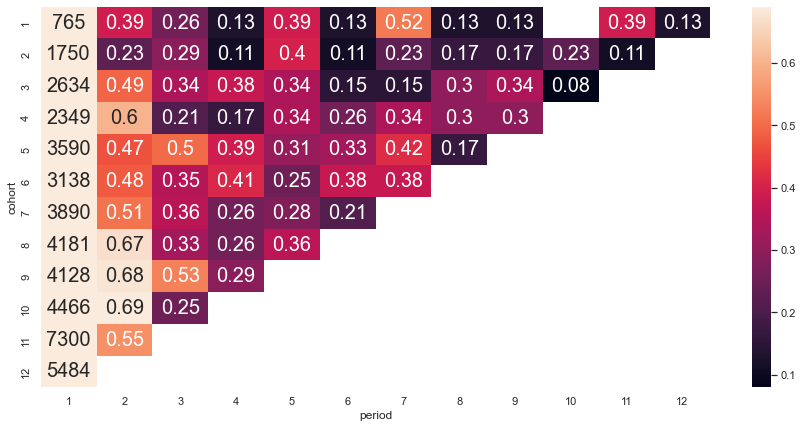

In [80]:
sns.heatmap(fifth_final, annot=True, vmin=fifth_final.iloc[:, 2:].min().min(), vmax=fifth_final.iloc[:, 1:].max().max(),
                fmt='g', annot_kws={'size': 20})

## 6 Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [93]:
sixth = purchases
sixth = purchases.merge(df_items, on='order_id')
sixth

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,YM,month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,2017-05,5,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,2018-01,1,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,2018-05,5,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,2018-03,3,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,2018-07,7,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,2018-04,4,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,2018-04,4,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,2018-04,4,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,2017-11,11,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


In [94]:
# Перевожу в datetime формат и нахожу последний день. Прибавляю к нему один и считаю данную дату за сегодняшнюю.
sixth.order_delivered_customer_date = pd.to_datetime(sixth.order_delivered_customer_date)
today = (sixth.order_delivered_customer_date.max() + timedelta(days=1))

In [95]:
sixth = sixth.groupby('customer_unique_id') \
    .agg({'order_purchase_timestamp': lambda x: (today - x.max()).days, 'product_id': 'count', 'price': 'sum'}) \
    .rename(columns={'order_purchase_timestamp': 'R', 'product_id': 'F', 'price': 'M'}).reset_index()
sixth

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90
2,0000f46a3911fa3c0805444483337064,586,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,496,2,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89
95417,ffff371b4d645b6ecea244b27531430a,617,1,89.90
95418,ffff5962728ec6157033ef9805bacc48,168,1,115.00


In [96]:
# Определю значения по квантилям.
quantiles = sixth.quantile(q=[0.20, 0.40, 0.60, 0.80]).to_dict()
quantiles

{'R': {0.2: 142.0, 0.4: 227.0, 0.6: 318.0, 0.8: 433.0},
 'F': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'M': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [97]:
def Rfunc(value, pname, qtable):
    if value <= qtable[pname][0.2]:
        return 1
    elif value <= qtable[pname][0.4]:
        return 2
    elif value <= qtable[pname][0.6]:
        return 3
    elif value <= qtable[pname][0.8]:
        return 4
    else:
        return 5

    
def FMfunc(value, pname, qtable):
    if value <= qtable[pname][0.2]:
        return 5
    elif value <= qtable[pname][0.4]:
        return 4
    elif value <= qtable[pname][0.6]:
        return 3
    elif value <= qtable[pname][0.8]:
        return 2
    else:
        return 1

In [98]:
sixth['R_score'] = sixth['R'].apply(Rfunc, args=('R', quantiles))
sixth['F_score'] = sixth['F'].apply(FMfunc, args=('F', quantiles))
sixth['M_score'] = sixth['M'].apply(FMfunc, args=('M', quantiles))

In [99]:
sixth['RFM_score'] = sixth.R_score.map(str) + sixth.F_score.map(str) + sixth.M_score.map(str)
sixth

,customer_unique_id,R,F,M,R_score,F_score,M_score,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,161,1,129.90,2,5,2,252
1,0000b849f77a49e4a4ce2b2a4ca5be3f,164,1,18.90,2,5,5,255
2,0000f46a3911fa3c0805444483337064,586,1,69.00,5,5,4,554
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,25.99,4,5,5,455
4,0004aac84e0df4da2b147fca70cf8255,337,1,180.00,4,5,1,451
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,496,2,1570.00,5,1,1,511
95416,fffea47cd6d3cc0a88bd621562a9d061,311,1,64.89,3,5,4,354
95417,ffff371b4d645b6ecea244b27531430a,617,1,89.90,5,5,3,553
95418,ffff5962728ec6157033ef9805bacc48,168,1,115.00,2,5,2,252


RFM 555 — Лояльные и активные: покупали недавно, покупают часто и много платят; 111 — покупали давно, покупают редко и мало платят; R=[1, 2], F=[4, 5], M=[4, 5] — Лояльные, потерявшие активность: покупали давно, но часто и много платили.